<a href="https://colab.research.google.com/github/Pilarppk/SIM_YAC_PARRALES_UPSE2023/blob/main/TRansmicibilidad%20implicito%20corregido.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import math


In [2]:
L=10000 #distancia del yacimiento
dx=250 #distancia eentre nodos
Tiempo= 100000 #tiempo total
DT=1 #delta tiempo
K=50 #permeabilidad MD
Por=0.2 #porosidad
vis=1 # viscosidad en ceentipoy
Beta=1
Comptotal=1**(-6) #psi-1
A=200000 #area ft**2


In [3]:
Alpha=K/(vis*Por*Comptotal) 
Alpha
Eta=(Alpha*DT)/(dx**2)
Eta

0.004

In [5]:
#esquema explicito
def Presdt(P0,P1,P2,Eta):
 Pdt=P1+Eta*(P0-2*P1+P2)
 return(Pdt)
 
Pexplicita=np.zeros((Tiempo//DT,(L//dx)+2))

In [6]:
#condiciones iniciales
Pyac=1000
Piz=0
Pder=500
Pin=np.ones((L//dx)+2)
Pres=np.zeros((L//dx)+2)
Pres2=np.zeros((L//dx)+2)
Pin=Pin*Pyac
Pin[0]=2*Piz-Pin[1]
Pin[len(Pin)-1]=2*Pder-Pin[len(Pin)-2]
Pin

array([-1000.,  1000.,  1000.,  1000.,  1000.,  1000.,  1000.,  1000.,
        1000.,  1000.,  1000.,  1000.,  1000.,  1000.,  1000.,  1000.,
        1000.,  1000.,  1000.,  1000.,  1000.,  1000.,  1000.,  1000.,
        1000.,  1000.,  1000.,  1000.,  1000.,  1000.,  1000.,  1000.,
        1000.,  1000.,  1000.,  1000.,  1000.,  1000.,  1000.,  1000.,
        1000.,     0.])

In [7]:
t=DT
Pexplicita[0]=Pin
Pexplicita.shape
while t<Tiempo: #ciclo de tiempo
  for i in range(0,len(Pin)-1):#ciclo de espacio
    if i==0:
      Pres[i]=2*Piz-Pin[1]
    elif i==len(Pin)-1:
      Pres[i]=2*Pder-Pin[len(Pin)-2]
    else:
      Pres[i]=Presdt(Pin[i-1],Pin[i],Pin[i+1],Eta)
  Pexplicita[t//DT]=Pres
  t=t+DT
  Pin=Pres
  

In [ ]:
Pexplicita #todas las presiones

array([[   0.        , 1000.        , 1000.        , ..., 1000.        ,
        1000.        ,  500.        ],
       [   0.        ,  999.        , 1000.        , ..., 1000.        ,
         999.5       ,    0.        ],
       [   0.        ,  998.002     ,  999.998002  , ...,  999.9995    ,
         998.5009995 ,    0.        ],
       ...,
       [   0.        ,   13.63312961,   26.89401597, ...,   26.88851639,
          13.62996975,    0.        ],
       [   0.        ,   13.63275736,   26.89328164, ...,   26.88778222,
          13.6295976 ,    0.        ],
       [   0.        ,   13.63238513,   26.89254734, ...,   26.88704806,
          13.62922545,    0.        ]])

In [17]:
#esquema implicito

Pimplicita=np.zeros((Tiempo//DT,L//dx+2))
Pin=np.ones((L//dx)+2)
Pres=np.zeros((L//dx)+2)
Pin=Pin*Pyac
Pin[0]=Piz
Pin[len(Pin)-1]=Pder
N=(L//dx)+2
Matriz_resolution=np.zeros([N-2,N-2])

In [18]:
for i in range(N-2):
  Matriz_resolution[i,i]=1+2*Eta
  if i>0:
    Matriz_resolution[i,i-1]=-Eta
  if i<(N-3):
    Matriz_resolution[i,i+1]=-Eta



In [28]:
Matriz_resolutio2=np.zeros_like(Matriz_resolution)
for i in range(0,N-3):
  Matriz_resolutio2[i,i]=1+2*Eta
  if i>0:
    Matriz_resolutio2[i,i-1]=-Eta
  if i<(N-4):
    Matriz_resolutio2[i,i+1]=-Eta
  Matriz_resolutio2[1,1]=1+3*Eta
Matriz_resolutio2[N-3,N-3]=1+Eta
Pin[1]=2*Eta*Piz

In [29]:
Pcal=np.zeros([N-2]) #guardar resultados
Pcal=np.linalg.solve(Matriz_resolutio2,Pin[1:-1])

In [30]:
Pcal

array([1.95221747e-002, 4.91958803e+000, 1.22824967e+001, 1.95547530e+001,
       2.66979615e+001, 3.36650341e+001, 4.04100065e+001, 4.68883800e+001,
       5.30574143e+001, 5.88764103e+001, 6.43069780e+001, 6.93132901e+001,
       7.38623182e+001, 7.79240509e+001, 8.14716916e+001, 8.44818353e+001,
       8.69346231e+001, 8.88138732e+001, 9.01071876e+001, 9.08060339e+001,
       9.09058018e+001, 9.04058330e+001, 8.93094262e+001, 8.76238147e+001,
       8.53601192e+001, 8.25332742e+001, 7.91619293e+001, 7.52683265e+001,
       7.08781532e+001, 6.60203731e+001, 6.07270344e+001, 5.50330592e+001,
       4.89760126e+001, 4.25958549e+001, 3.59346783e+001, 2.90364286e+001,
       2.19466159e+001, 1.47120142e+001, 7.38035240e+000, 4.25323227e-171])

In [ ]:
Pres=np.concatenate(([Piz],Pcal,[Pder])) #tomar varios valores y juntarlos(Pfrontera)
Pres

array([   0.        ,  999.00199501,  999.99900399,  999.99999901,
       1000.        , 1000.        , 1000.        , 1000.        ,
       1000.        , 1000.        , 1000.        , 1000.        ,
       1000.        , 1000.        , 1000.        , 1000.        ,
        999.99999901,  999.99900399,  999.00199501,  500.        ])

In [25]:
#presion implicita
Pimplicita[0]=Pin
t=DT
while t<Tiempo:
  Pcal=np.linalg.solve(Matriz_resolutio2,Pin[1:-1])
  Pres=np.concatenate(([Piz],Pcal,[Pder]))
  Pin=Pres
  t=t+DT

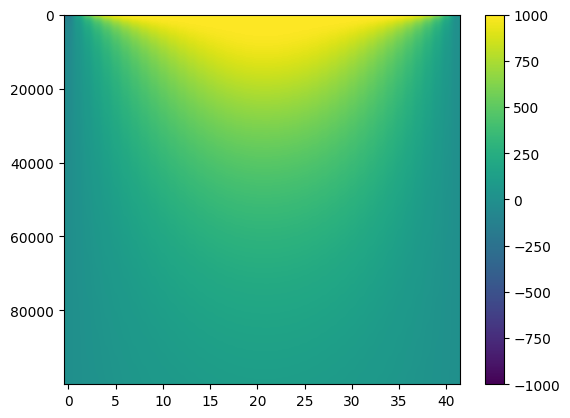

In [26]:

import matplotlib.pyplot as plt
imgplot=plt.imshow(Pexplicita,aspect='auto')
plt.colorbar()

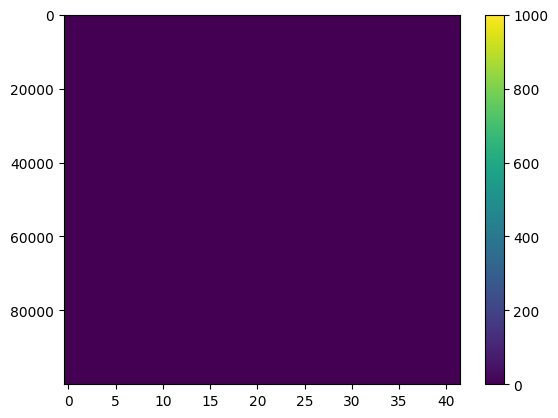

In [27]:
import matplotlib.pyplot as plt
imgplot=plt.imshow(Pimplicita,aspect='auto')
plt.colorbar()